In [11]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [15]:
data=pd.read_csv('Diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [17]:
data.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [19]:
data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

<Axes: >

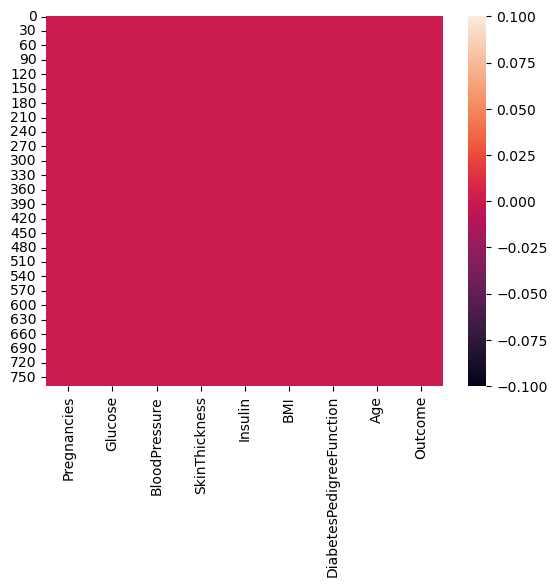

In [10]:
sns.heatmap(data.isnull())

In [21]:
correlation = data.corr()
print(correlation)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

<Axes: >

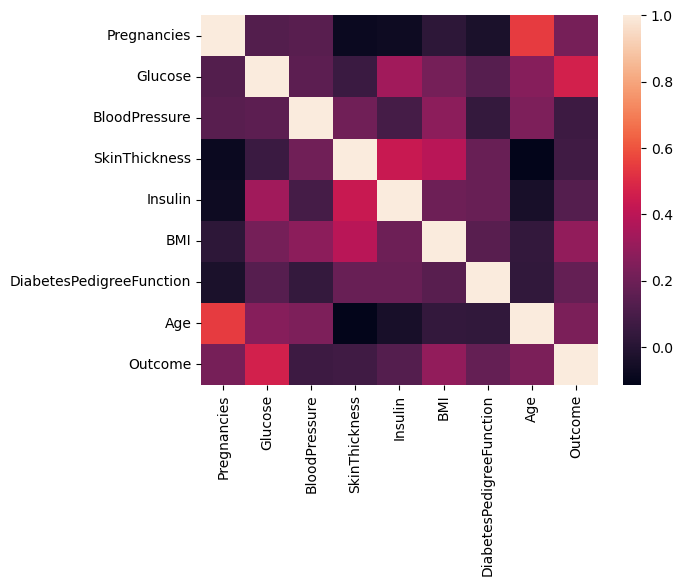

In [23]:
sns.heatmap(correlation)

C:\Users\saini\AppData\Local\Temp\ipykernel_25772\3203303550.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kde = sns.kdeplot(data["Pregnancies"][data["Outcome"]==1],color = "red",shade=True)
C:\Users\saini\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\saini\AppData\Local\Temp\ipykernel_25772\3203303550.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kde = sns.kdeplot(data["Pregnancies"][data["Outcome"]==0],color = "blue",shade=True)
C:\Users\saini\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is depreca

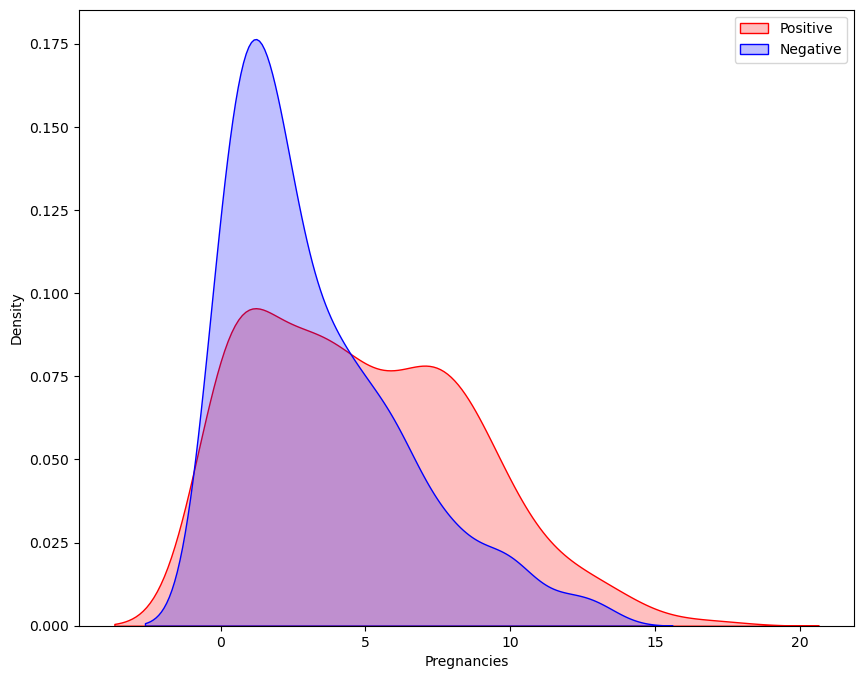

In [25]:
plt.figure(figsize=(10,8))
kde = sns.kdeplot(data["Pregnancies"][data["Outcome"]==1],color = "red",shade=True)
kde = sns.kdeplot(data["Pregnancies"][data["Outcome"]==0],color = "blue",shade=True)
kde.set_xlabel("Pregnancies")
kde.set_ylabel("Density")
kde.legend(["Positive","Negative"])

<Axes: >

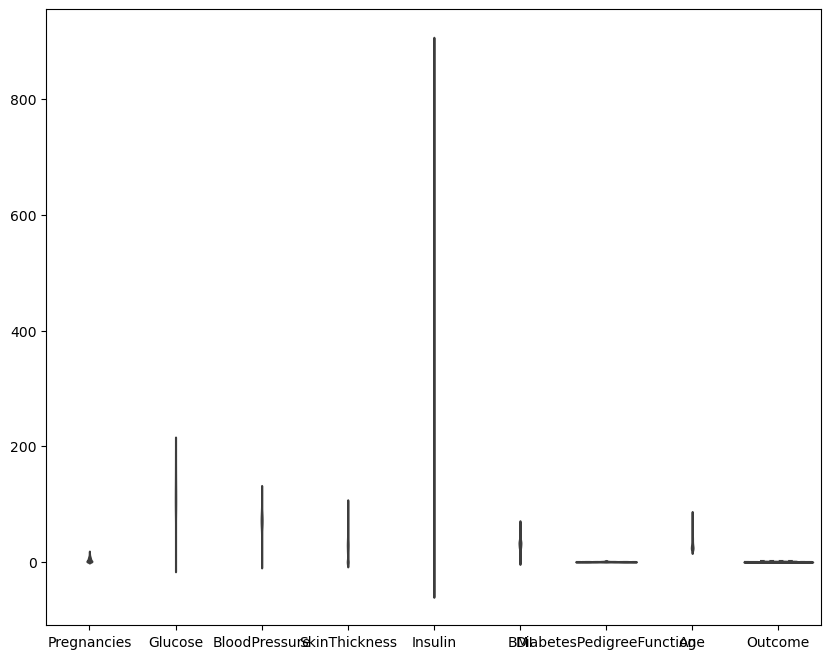

In [27]:
plt.figure(figsize = (10,8))
sns.violinplot(data,X="Outcome" , Y="Glucose" , split=True,Linewidth=2,inner="quart")

In [31]:
data["Glucose"] = data["Glucose"].replace(0 , data["Glucose"].median())
data["BloodPressure"] = data["BloodPressure"].replace(0 , data["BloodPressure"].median())
data["BMI"] = data["BMI"].replace(0 , data["BMI"].median())
data["SkinThickness"] = data["SkinThickness"].replace(0 , data["SkinThickness"].median())
data["Insulin"] = data["Insulin"].replace(0 , data["Insulin"].median())
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.0,32.9,0.171,63,0
764,2,122,70,27,30.5,36.8,0.340,27,0
765,5,121,72,23,112.0,26.2,0.245,30,0
766,1,126,60,23,30.5,30.1,0.349,47,1


In [41]:
x=data.drop("Outcome",axis=1)
y=data["Outcome"]
x_train,x_test,y_train,y_test=train_test_split(x , y , test_size=0.2)
x_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
334,1,95,60,18,58.0,23.9,0.260,22
269,2,146,72,23,30.5,27.5,0.240,28
198,4,109,64,44,99.0,34.8,0.905,26
507,1,130,60,23,170.0,28.6,0.692,21
628,5,128,80,23,30.5,34.6,0.144,45
...,...,...,...,...,...,...,...,...
191,9,123,70,44,94.0,33.1,0.374,40
738,2,99,60,17,160.0,36.6,0.453,21
655,2,155,52,27,540.0,38.7,0.240,25
356,1,125,50,40,167.0,33.3,0.962,28


In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
training_accuracy = []
test_accuracy = []
for n_neighbors in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(x_train , y_train)

    training_accuracy.append(knn.score(x_train,y_train))
    test_accuracy.append(knn.score(x_test,y_test))

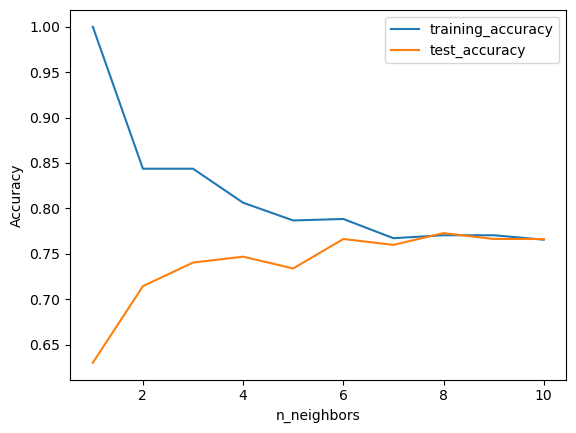

In [43]:
plt.plot(range(1,11), training_accuracy,label = "training_accuracy")
plt.plot(range(1,11), test_accuracy,label = "test_accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()


In [47]:
predictions = model.predict(x_test)
predictions

NameError: name 'model' is not defined

In [49]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train , y_train)
print(knn.score(x_train,y_train), ": Training accuracy")
print(knn.score(x_test,y_test), ": Test accuracy")

0.7687296416938111 : Training accuracy
0.7857142857142857 : Test accuracy


In [51]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)
dt.fit(x_train,y_train)
print(dt.score(x_train,y_train),": Training accuracy")
print(dt.score(x_test,y_test), ": Test accuracy")

1.0 : Training accuracy
0.6818181818181818 : Test accuracy


In [53]:
dt1= DecisionTreeClassifier(random_state=0,max_depth=3)
dt1.fit(x_train,y_train)
print(dt1.score(x_train,y_train),": Training accuracy")
print(dt1.score(x_test,y_test), ": Test accuracy")

0.752442996742671 : Training accuracy
0.7922077922077922 : Test accuracy


In [55]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(random_state=42)
mlp.fit(x_train,y_train)
print(mlp.score(x_train,y_train),": Training accuracy")
print(mlp.score(x_test,y_test), ": Test accuracy")

0.739413680781759 : Training accuracy
0.7077922077922078 : Test accuracy


In [57]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.fit_transform(x_test)


In [59]:
mlp1=MLPClassifier(random_state=42)
mlp1.fit(x_train,y_train)
print(mlp1.score(x_train,y_train),": Training accuracy")
print(mlp1.score(x_test,y_test), ": Test accuracy")

0.739413680781759 : Training accuracy
0.7077922077922078 : Test accuracy
